In [1]:
from pathlib import Path

import util
from util import workflow

browser = False
file = util.notebook_file() if util.is_notebook() else __file__
tag = util.file_tag(file)
root_path = Path("..")

In [3]:
from util import p_

import automech

mech0 = automech.io.read(
    p_.original_mechanism(tag, ext="json", path=p_.data(root_path))
)
mech = automech.io.read(
    p_.mechanism(tag, ext="json", path=p_.data(root_path))
)
print(automech.reaction_count(mech0))
print(automech.reaction_count(mech))

automech.display(mech0)
automech.display(mech)

4
14


In [2]:
# # Build
# from automol.graph import enum

# import automech
# from automech.species import Species

# par_mech = workflow.read_parent_mechanism(root_path=root_path)
# mech = automech.from_smiles(
#     spc_smis=["C12C(O2)[CH]CC1", "C12C(O2)C[CH]C1"],
#     src_mech=par_mech,
# )
# #  - O2 additions
# mech = automech.enumerate_reactions(
#     mech,
#     enum.ReactionSmarts.o2_addition,
#     rcts_=[None, "[O][O]"],
#     spc_col_=Species.smiles,
#     src_mech=par_mech,
# )
# #  - HO2 elimination
# mech = automech.enumerate_reactions(
#     mech,
#     enum.ReactionSmarts.ho2_elimination,
#     spc_col_=Species.smiles,
#     src_mech=par_mech,
# )
# #  - drop alpha HO2 elimination that we can't currently handle
# mech = automech.drop_reactions_by_smiles(
#     # >> suspiciously low frequency, could not be confirmed by IRC due to failure
#     mech,
#     rxn_smis=["[O]OC1CCC2C1O2>>[O]O.C=1CCC2C=1O2"],
# )
# automech.display(mech)

In [3]:
# # Write
# workflow.write(mech=mech, tag=tag, root_path=root_path, browser=browser)

In [4]:
# # Read
# workflow.prepare_simulation(tag=tag, root_path=root_path)

name: C5H8(522)
smiles: C1CC=CC1


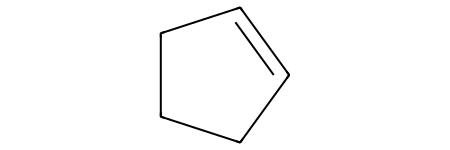

alt.LayerChart(...)

name: C5H8O(825)
smiles: O1C2C1CCC2


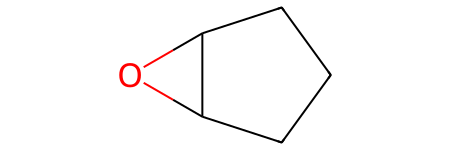

alt.LayerChart(...)

name: CPT(563)
smiles: C1CCCC1


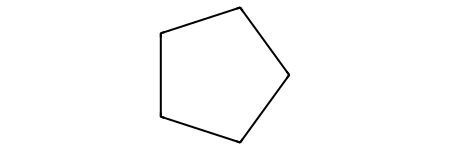

alt.LayerChart(...)

name: O2(6)
smiles: O=O


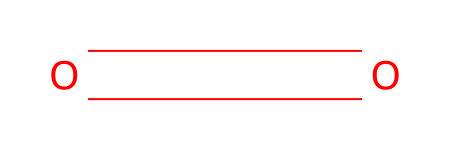

alt.LayerChart(...)

name: H2(2)
smiles: [H][H]


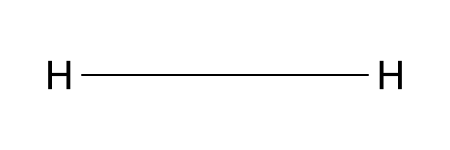

alt.LayerChart(...)

name: H2O(5)
smiles: O


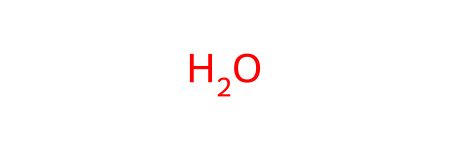

alt.LayerChart(...)

name: CO(12)
smiles: O=[C]


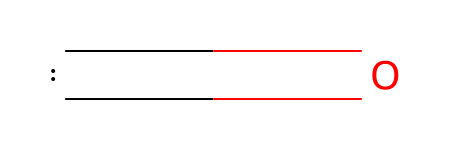

alt.LayerChart(...)

name: CO2(13)
smiles: O=C=O


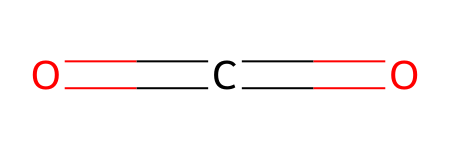

alt.LayerChart(...)

name: CH4(33)
smiles: C


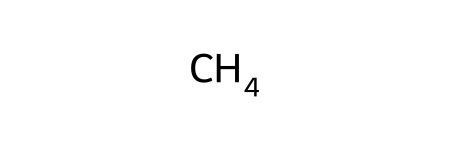

alt.LayerChart(...)

name: CH3CHO(41)
smiles: O=CC


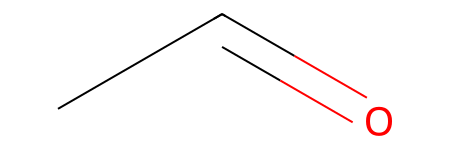

alt.LayerChart(...)

name: C2H4(52)
smiles: C=C


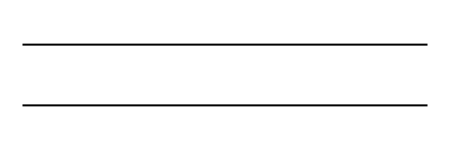

alt.LayerChart(...)

name: C3H6(131)
smiles: CC=C


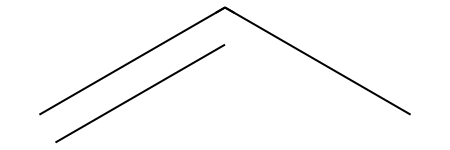

alt.LayerChart(...)

name: C3H4O(165)
smiles: O=CC=C


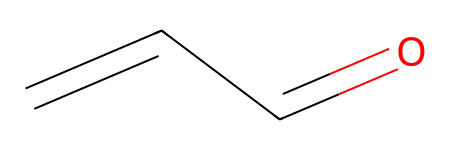

alt.LayerChart(...)

name: C4H6(227)
smiles: C=CC=C


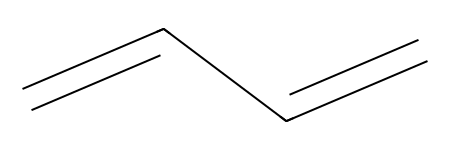

alt.LayerChart(...)

name: C4H8(253)
smiles: CCC=C


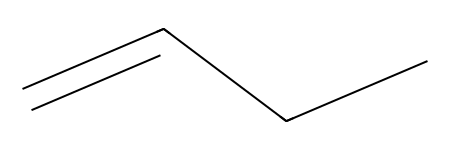

alt.LayerChart(...)

name: C5H6(478)
smiles: C1C=CC=C1


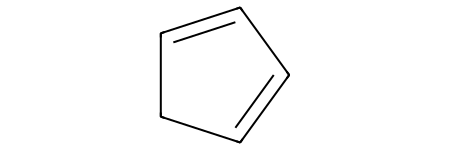

alt.LayerChart(...)

name: C6H6(970)
smiles: C1=CC=CC=C1


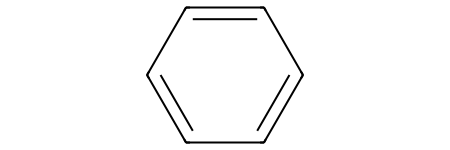

alt.LayerChart(...)

In [5]:
from util import p_

import automech

# Plot
chart_dct = workflow.plot_simulation(
    tag=tag,
    x_col="O2_molecules",
    root_path=root_path,
    line_source_=["Hill", "Lokachari"],
    point_source="Experiment",
    control=False,
)
mech = automech.io.read(
    p_.full_calculated_mechanism(tag, "json", path=p_.data(root_path))
)
for name, chart in chart_dct.items():
    automech.display_species(mech, [name])
    chart.show()

In [6]:
# Write
workflow.plot_rates(tag=tag, root_path=root_path)


Reading mechanisms...

Compare calculated mechanism to parent mechanism...

*********
Reaction: S(1690)rrr1 = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1690)rrr1 = HO2(8) + S(1288)rs0                            1.000      0.000      0.000
        PLOG  /     0.1000  5.855E+65     -17.41      44318/
        PLOG  /      1.000  1.510E+60     -15.27      44373/
        PLOG  /      10.00  4.215E+50     -11.97      42768/
        PLOG  /      100.0  4.169E+36     -7.420      38803/
  Hill:
    S(1690) = HO2(8) + S(1288)                              3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs0 = S(1690)rrr1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O[C@@H]1CC[C@@H]2[C@H]1O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs0 = S(1690)rrr1                          1.000      0.000      0.000
        PLOG  /     0.1000  2.519E+69     -18.56      16358/
        PLOG  /      1.000  3.563E+63     -16.35      16247/
        PLOG  /      10.00  7.709E+52     -12.72      14104/
        PLOG  /      100.0  7.745E+37     -7.898       9584/
  Hill:
    O2(6) + C5H7O(758) = S(1690)                             7.574E+12    -0.1290      0.000


alt.Chart(...)


*********
Reaction: S(1690)rsr1 = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['[O]O[C@H]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1690)rsr1 = HO2(8) + S(1288)rs0                            1.000      0.000      0.000
        PLOG  /     0.1000  3.733E+63     -17.14      44088/
        PLOG  /      1.000  6.983E+63     -16.72      46520/
        PLOG  /      10.00  1.828E+55     -13.62      45719/
        PLOG  /      100.0  1.564E+42     -9.257      42683/
  Hill:
    S(1690) = HO2(8) + S(1288)                              3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs0 = S(1690)rsr1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O[C@H]1CC[C@@H]2[C@H]1O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs0 = S(1690)rsr1                          1.000      0.000      0.000
        PLOG  /     0.1000  5.860E+69     -18.77      16033/
        PLOG  /      1.000  2.648E+63     -16.39      15723/
        PLOG  /      10.00  9.556E+52     -12.82      13740/
        PLOG  /      100.0  7.320E+40     -8.843      10557/
  Hill:
    O2(6) + C5H7O(758) = S(1690)                             7.574E+12    -0.1290      0.000


alt.Chart(...)


*********
Reaction: S(1691)rrs = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['[O]O[C@H]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1691)rrs = HO2(8) + S(1288)rs0                             1.000      0.000      0.000
        PLOG  /     0.1000  5.719E+64     -16.79      45438/
        PLOG  /      1.000  1.396E+55     -13.47      43821/
        PLOG  /      10.00  3.438E+43     -9.626      40982/
        PLOG  /      100.0  5.693E+30     -5.542      36996/
  Hill:
    S(1691) = HO2(8) + S(1288)                              6600000000      1.010      29600


alt.Chart(...)


*********
Reaction: S(1691)rrs = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['[O]O[C@H]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    S(1691)rrs = HO2(8) + S(1288)rs1                             1.000      0.000      0.000
        PLOG  /     0.1000  5.719E+64     -16.79      45438/
        PLOG  /      1.000  1.396E+55     -13.47      43821/
        PLOG  /      10.00  3.438E+43     -9.626      40982/
        PLOG  /      100.0  5.693E+30     -5.542      36996/
  Hill:
    S(1691) = HO2(8) + S(1288)                              6600000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = S(1691)rrs
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O[C@H]1C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = S(1691)rrs                               1.000      0.000      0.000
        PLOG  /     0.1000  8.023E+67     -17.83      17125/
        PLOG  /      1.000  1.320E+58     -14.45      15431/
        PLOG  /      10.00  1.492E+47     -10.81      12830/
        PLOG  /      100.0  2.127E+34     -6.718       8760/
  Hill:
    O2(6) + S(1289) = S(1691)                                1.408E+13   -0.08700      0.000


alt.Chart(...)


*********
Reaction: S(1691)srs = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    S(1691)srs = HO2(8) + S(1288)rs0                             1.000      0.000      0.000
        PLOG  /     0.1000  9.329E+67     -17.96      47155/
        PLOG  /      1.000  1.083E+60     -15.10      46416/
        PLOG  /      10.00  2.372E+47     -10.88      43468/
        PLOG  /      100.0  4.287E+33     -6.459      39351/
  Hill:
    S(1691) = HO2(8) + S(1288)                              6600000000      1.010      29600


alt.Chart(...)


*********
Reaction: S(1691)srs = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    S(1691)srs = HO2(8) + S(1288)rs1                             1.000      0.000      0.000
        PLOG  /     0.1000  9.329E+67     -17.96      47155/
        PLOG  /      1.000  1.083E+60     -15.10      46416/
        PLOG  /      10.00  2.372E+47     -10.88      43468/
        PLOG  /      100.0  4.287E+33     -6.459      39351/
  Hill:
    S(1691) = HO2(8) + S(1288)                              6600000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = S(1691)srs
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O[C@@H]1C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = S(1691)srs                               1.000      0.000      0.000
        PLOG  /     0.1000  9.398E+68     -18.24      17122/
        PLOG  /      1.000  4.682E+60     -15.29      16065/
        PLOG  /      10.00  1.141E+47     -10.82      12494/
        PLOG  /      100.0  2.850E+34     -6.784       8625/
  Hill:
    O2(6) + S(1289) = S(1691)                                1.408E+13   -0.08700      0.000


alt.Chart(...)


*********
Reaction: S(1690)rrr0 = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['[O]O[C@H]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    S(1690)rrr0 = HO2(8) + S(1288)rs1                            1.000      0.000      0.000
        PLOG  /     0.1000  5.855E+65     -17.41      44318/
        PLOG  /      1.000  1.510E+60     -15.27      44373/
        PLOG  /      10.00  4.215E+50     -11.97      42768/
        PLOG  /      100.0  4.169E+36     -7.420      38803/
  Hill:
    S(1690) = HO2(8) + S(1288)                              3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs1 = S(1690)rrr0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O[C@H]1CC[C@H]2[C@@H]1O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs1 = S(1690)rrr0                          1.000      0.000      0.000
        PLOG  /     0.1000  2.519E+69     -18.56      16358/
        PLOG  /      1.000  3.563E+63     -16.35      16247/
        PLOG  /      10.00  7.709E+52     -12.72      14104/
        PLOG  /      100.0  7.745E+37     -7.898       9584/
  Hill:
    O2(6) + C5H7O(758) = S(1690)                             7.574E+12    -0.1290      0.000


alt.Chart(...)


*********
Reaction: S(1690)rsr0 = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    S(1690)rsr0 = HO2(8) + S(1288)rs1                            1.000      0.000      0.000
        PLOG  /     0.1000  3.733E+63     -17.14      44088/
        PLOG  /      1.000  6.983E+63     -16.72      46520/
        PLOG  /      10.00  1.828E+55     -13.62      45719/
        PLOG  /      100.0  1.564E+42     -9.257      42683/
  Hill:
    S(1690) = HO2(8) + S(1288)                              3300000000      1.010      29600


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs1 = S(1690)rsr0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O[C@@H]1CC[C@H]2[C@@H]1O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs1 = S(1690)rsr0                          1.000      0.000      0.000
        PLOG  /     0.1000  5.860E+69     -18.77      16033/
        PLOG  /      1.000  2.648E+63     -16.39      15723/
        PLOG  /      10.00  9.556E+52     -12.82      13740/
        PLOG  /      100.0  7.320E+40     -8.843      10557/
  Hill:
    O2(6) + C5H7O(758) = S(1690)                             7.574E+12    -0.1290      0.000


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs0 = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs0 = HO2(8) + S(1288)rs0                  1.000      0.000      0.000
        PLOG  /     0.1000     116600      1.656      419.0/
        PLOG  /      1.000  190500000     0.8450       5173/
        PLOG  /      1.000  1.140E+37     -8.081      14895/
        PLOG  /      10.00  3.064E+27     -4.205      29545/
        PLOG  /      10.00  7.777E+28     -5.246      15011/
        PLOG  /      100.0  4.580E+21     -2.889      15129/


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs0 = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@@H]2[C@H]1O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs0 = HO2(8) + S(1288)rs0                  1.000      0.000      0.000
        PLOG  /     0.1000      73.38      2.517       1476/
        PLOG  /      1.000     306700      1.500       4063/
        PLOG  /      10.00  1.139E+14    -0.6840      16865/
        PLOG  /      10.00  2.073E+27     -4.992      15337/
        PLOG  /      100.0  7.354E+17     -1.907      14640/


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = HO2(8) + S(1288)rs0                      1.000      0.000      0.000
        PLOG  /     0.1000  783600000     0.7350       4364/
        PLOG  /     0.1000  5.942E+37     -8.253      13761/
        PLOG  /      1.000  1.068E+18     -1.659      16035/
        PLOG  /      1.000  4.080E+34     -6.964      15680/
        PLOG  /      10.00  9.886E+22     -3.233      14061/
        PLOG  /      100.0  3.325E+22     -2.966      17111/


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = HO2(8) + S(1288)rs1                      1.000      0.000      0.000
        PLOG  /     0.1000  783600000     0.7350       4364/
        PLOG  /     0.1000  5.942E+37     -8.253      13761/
        PLOG  /      1.000  1.068E+18     -1.659      16035/
        PLOG  /      1.000  4.080E+34     -6.964      15680/
        PLOG  /      10.00  9.886E+22     -3.233      14061/
        PLOG  /      100.0  3.325E+22     -2.966      17111/


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = HO2(8) + S(1288)rs0
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@H]2[C@@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = HO2(8) + S(1288)rs0                      1.000      0.000      0.000
        PLOG  /     0.1000    5345000      1.282       3976/
        PLOG  /     0.1000  7.599E+34     -7.553      13070/
        PLOG  /      1.000  321500000     0.8130       6099/
        PLOG  /      1.000  7.265E+41     -9.398      19084/
        PLOG  /      10.00  1.211E+20     -2.478      13178/
        PLOG  /      100.0  7.551E+21     -2.867      17311/


alt.Chart(...)


*********
Reaction: O2(6) + S(1289)rs = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1C[C@H]2[C@@H](C1)O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + S(1289)rs = HO2(8) + S(1288)rs1                      1.000      0.000      0.000
        PLOG  /     0.1000    5345000      1.282       3976/
        PLOG  /     0.1000  7.599E+34     -7.553      13070/
        PLOG  /      1.000  321500000     0.8130       6099/
        PLOG  /      1.000  7.265E+41     -9.398      19084/
        PLOG  /      10.00  1.211E+20     -2.478      13178/
        PLOG  /      100.0  7.551E+21     -2.867      17311/


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs1 = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs1 = HO2(8) + S(1288)rs1                  1.000      0.000      0.000
        PLOG  /     0.1000     116600      1.656      419.0/
        PLOG  /      1.000  190500000     0.8450       5173/
        PLOG  /      1.000  1.140E+37     -8.081      14895/
        PLOG  /      10.00  3.064E+27     -4.205      29545/
        PLOG  /      10.00  7.777E+28     -5.246      15011/
        PLOG  /      100.0  4.580E+21     -2.889      15129/


alt.Chart(...)


*********
Reaction: O2(6) + C5H7O(758)rs1 = HO2(8) + S(1288)rs1
Translations:
  smiles:
    reactants = ['O=O', '[CH]1CC[C@H]2[C@@H]1O2']
    products = ['[O]O', 'C1=C[C@@H]2[C@H](C1)O2']
Rate parameters:
  This work:
    O2(6) + C5H7O(758)rs1 = HO2(8) + S(1288)rs1                  1.000      0.000      0.000
        PLOG  /     0.1000      73.38      2.517       1476/
        PLOG  /      1.000     306700      1.500       4063/
        PLOG  /      10.00  1.139E+14    -0.6840      16865/
        PLOG  /      10.00  2.073E+27     -4.992      15337/
        PLOG  /      100.0  7.354E+17     -1.907      14640/


alt.Chart(...)

In [7]:
# import automech
# from mechdriver.subtasks import display

# chan = "1: 14"

# # TRANSITION STATE
# #   - Read in expanded mechanism
# mech_path = util.p_.mechanism(tag, ext="json", path=util.p_.data(root_path))
# mech = automech.io.read(mech_path)

# #   - Display the reaction
# automech.display_reactions(mech, chans=[chan])

In [8]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("conf_opt", chan, path=calc_path)

In [9]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("find_ts", chan, path=calc_path)

In [10]:
# #   - Display the IRC
# calc_path = util.p_.calc(root_path, tag)
# display("rpath_scan", chan, path=calc_path)

In [11]:
# # REACTION RATE
# #   - Read in calculated mechanism
# cal_mech = automech.io.read(data_path / f"{tag}_calc.json")

# #   - Read in other mechanisms for comparison
# par_mech = automech.io.read(data_path / "full_raw.json")
# tags0 = util.previous_tags(tag)
# trues = [True] * len(tags0)
# names0 = list(map(util.calculated_mechanism_name, tags0))
# mechs0 = [automech.io.read(data_path / f"{name}.json") for name in names0]

# #   - Display the reaction and calculated rate
# automech.display_reactions(
#     cal_mech,
#     chans=[chan],
#     comp_mechs=[par_mech, *mechs0],
#     comp_labels=["Hill", *tags0],
#     comp_stereo=[False, *trues],
# )